<a href="https://colab.research.google.com/github/vinodnbhat/AIML-CEP-2021-Assignments/blob/main/Final%20Asgn_Q2_v3_Optimized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

(a) [C, R] Some of the attributes in the data set are text data. Use a suitable procedure to convert them into suitable numerical representations in the training data and test data. Explain the procedure you used for the conversion.

In [83]:
spam_classification_train_data = pd.read_excel('Q2_classification_train.xlsx', index_col = False)
spam_classification_train_data.head()

,spam,to_multiple,from,cc,sent_email,image,attach,dollar,winner,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
0,0,0,1,0,0,0,0,0,no,0,0,0,11.370,202,1,0,0,0,0,big
1,0,0,1,0,0,0,0,0,no,0,0,0,10.504,202,1,0,0,0,1,small
2,0,0,1,0,0,0,0,0,no,0,0,0,13.256,255,1,0,0,0,48,small
3,0,0,1,0,0,0,0,0,no,0,0,2,1.231,29,0,0,0,0,1,none
4,0,0,1,0,0,0,0,0,no,0,0,2,1.091,25,0,0,0,0,1,none


In [84]:
spam_classification_train_data['winner'] =spam_classification_train_data['winner'].astype('category').cat.codes
spam_classification_train_data['number'] =spam_classification_train_data['number'].astype('category').cat.codes
spam_classification_train_data.head()

,spam,to_multiple,from,cc,sent_email,image,attach,dollar,winner,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
0,0,0,1,0,0,0,0,0,0,0,0,0,11.370,202,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,10.504,202,1,0,0,0,1,2
2,0,0,1,0,0,0,0,0,0,0,0,0,13.256,255,1,0,0,0,48,2
3,0,0,1,0,0,0,0,0,0,0,0,2,1.231,29,0,0,0,0,1,1
4,0,0,1,0,0,0,0,0,0,0,0,2,1.091,25,0,0,0,0,1,1


In [85]:
spam_classification_train_data

,spam,to_multiple,from,cc,sent_email,image,attach,dollar,winner,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
0,0,0,1,0,0,0,0,0,0,0,0,0,11.370,202,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,10.504,202,1,0,0,0,1,2
2,0,0,1,0,0,0,0,0,0,0,0,0,13.256,255,1,0,0,0,48,2
3,0,0,1,0,0,0,0,0,0,0,0,2,1.231,29,0,0,0,0,1,1
4,0,0,1,0,0,0,0,0,0,0,0,2,1.091,25,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3131,1,0,1,0,0,0,0,2,0,0,0,0,1.597,46,0,0,1,0,3,2
3132,1,0,1,0,0,0,0,1,0,0,0,0,0.333,13,0,0,0,0,0,0
3133,1,0,1,0,0,0,0,0,0,0,0,0,0.332,12,0,0,0,0,0,2
3134,1,0,1,0,0,0,0,2,1,0,0,0,2.225,65,0,0,1,0,1,2


In [86]:
spam_classification_test_data = pd.read_excel('Q2_classification_test.xlsx', index_col = False)
spam_classification_test_data.head()

,spam,to_multiple,from,cc,sent_email,image,attach,dollar,winner,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
0,1,0,1,0,0,0,0,0,no,0,0,0,20.133,364,1,0,0,0,8,small
1,1,0,1,0,0,0,0,0,no,0,0,0,3.796,71,1,0,0,0,4,small
2,1,0,1,0,0,0,0,0,no,0,0,0,2.705,35,1,0,0,0,0,none
3,1,0,1,4,0,0,2,0,no,0,0,0,0.537,22,0,0,0,0,3,small
4,1,0,1,0,0,0,0,0,no,0,0,0,4.174,2,0,0,0,0,0,none


In [87]:
spam_classification_test_data['winner'] =spam_classification_test_data['winner'].astype('category').cat.codes
spam_classification_test_data['number'] =spam_classification_test_data['number'].astype('category').cat.codes
spam_classification_test_data.head()

,spam,to_multiple,from,cc,sent_email,image,attach,dollar,winner,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
0,1,0,1,0,0,0,0,0,0,0,0,0,20.133,364,1,0,0,0,8,2
1,1,0,1,0,0,0,0,0,0,0,0,0,3.796,71,1,0,0,0,4,2
2,1,0,1,0,0,0,0,0,0,0,0,0,2.705,35,1,0,0,0,0,1
3,1,0,1,4,0,0,2,0,0,0,0,0,0.537,22,0,0,0,0,3,2
4,1,0,1,0,0,0,0,0,0,0,0,0,4.174,2,0,0,0,0,0,1


In [88]:
spam_classification_test_data

,spam,to_multiple,from,cc,sent_email,image,attach,dollar,winner,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
0,1,0,1,0,0,0,0,0,0,0,0,0,20.133,364,1,0,0,0,8,2
1,1,0,1,0,0,0,0,0,0,0,0,0,3.796,71,1,0,0,0,4,2
2,1,0,1,0,0,0,0,0,0,0,0,0,2.705,35,1,0,0,0,0,1
3,1,0,1,4,0,0,2,0,0,0,0,0,0.537,22,0,0,0,0,3,2
4,1,0,1,0,0,0,0,0,0,0,0,0,4.174,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,0,0,1,0,0,0,0,0,0,0,0,0,31.104,744,1,0,0,0,3,2
781,0,0,1,0,0,0,0,0,0,0,0,0,30.201,728,1,0,0,0,3,2
782,0,0,1,0,0,0,0,10,0,0,0,0,74.753,1953,1,0,0,0,27,2
783,0,0,1,0,0,0,0,25,0,0,0,0,16.863,570,1,0,0,0,3,2


Checking class balance of training data

In [89]:
# Checking class balance of training data
train_spam_class_0 = spam_classification_train_data[spam_classification_train_data['spam'] == 0]
train_spam_class_1 = spam_classification_train_data[spam_classification_train_data['spam'] == 1]
print('Train spam_class 0:', train_spam_class_0.shape)
print('Train spam_class 1:', train_spam_class_1.shape)
print('Training data shows class imbalance')

Train spam_class 0: (2842, 20)
Train spam_class 1: (294, 20)
Training data shows class imbalance


In [90]:
# Checking class balance of test data
test_spam_class_0 = spam_classification_test_data[spam_classification_test_data['spam'] == 0]
test_spam_class_1 = spam_classification_test_data[spam_classification_test_data['spam'] == 1]
print('Test spam class 0:', test_spam_class_0.shape)
print('Test spam class 1:', test_spam_class_1.shape)
print('Test data shows class imbalance')

Test spam class 0: (712, 20)
Test spam class 1: (73, 20)
Test data shows class imbalance


Both training anf test data sets show class imbalance.
We will use SMOTE to balance the classes in both the training and test datasets

In [92]:
n_train = len(spam_classification_train_data.index)
print('number of datapoints in train dataset:', n_train)

n_test = len(spam_classification_test_data.index)
print('number of datapoints in test dataset:', n_test)

number of datapoints in train dataset: 3136
number of datapoints in test dataset: 785


In [95]:
cols = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13 ,14 ,15, 16, 17, 18, 19]
response_cols = [0]

In [96]:
train_X_data = spam_classification_train_data[spam_classification_train_data.columns[cols]]
train_X_data

,to_multiple,from,cc,sent_email,image,attach,dollar,winner,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
0,0,1,0,0,0,0,0,0,0,0,0,11.370,202,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,10.504,202,1,0,0,0,1,2
2,0,1,0,0,0,0,0,0,0,0,0,13.256,255,1,0,0,0,48,2
3,0,1,0,0,0,0,0,0,0,0,2,1.231,29,0,0,0,0,1,1
4,0,1,0,0,0,0,0,0,0,0,2,1.091,25,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3131,0,1,0,0,0,0,2,0,0,0,0,1.597,46,0,0,1,0,3,2
3132,0,1,0,0,0,0,1,0,0,0,0,0.333,13,0,0,0,0,0,0
3133,0,1,0,0,0,0,0,0,0,0,0,0.332,12,0,0,0,0,0,2
3134,0,1,0,0,0,0,2,1,0,0,0,2.225,65,0,0,1,0,1,2


In [97]:
train_X_array = train_X_data.to_numpy()
train_X_array

array([[ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  1.,  2.],
       [ 0.,  1.,  0., ...,  0., 48.,  2.],
       ...,
       [ 0.,  1.,  0., ...,  0.,  0.,  2.],
       [ 0.,  1.,  0., ...,  0.,  1.,  2.],
       [ 0.,  1.,  0., ...,  0.,  0.,  2.]])

In [98]:
train_y = spam_classification_train_data[spam_classification_train_data.columns[response_cols]].to_numpy()
train_y

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [99]:
test_X_data = spam_classification_test_data[spam_classification_test_data.columns[cols]]
test_X_data

,to_multiple,from,cc,sent_email,image,attach,dollar,winner,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
0,0,1,0,0,0,0,0,0,0,0,0,20.133,364,1,0,0,0,8,2
1,0,1,0,0,0,0,0,0,0,0,0,3.796,71,1,0,0,0,4,2
2,0,1,0,0,0,0,0,0,0,0,0,2.705,35,1,0,0,0,0,1
3,0,1,4,0,0,2,0,0,0,0,0,0.537,22,0,0,0,0,3,2
4,0,1,0,0,0,0,0,0,0,0,0,4.174,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,0,1,0,0,0,0,0,0,0,0,0,31.104,744,1,0,0,0,3,2
781,0,1,0,0,0,0,0,0,0,0,0,30.201,728,1,0,0,0,3,2
782,0,1,0,0,0,0,10,0,0,0,0,74.753,1953,1,0,0,0,27,2
783,0,1,0,0,0,0,25,0,0,0,0,16.863,570,1,0,0,0,3,2


In [100]:
test_X_array = test_X_data.to_numpy()
test_X_array

array([[ 0.,  1.,  0., ...,  0.,  8.,  2.],
       [ 0.,  1.,  0., ...,  0.,  4.,  2.],
       [ 0.,  1.,  0., ...,  0.,  0.,  1.],
       ...,
       [ 0.,  1.,  0., ...,  0., 27.,  2.],
       [ 0.,  1.,  0., ...,  0.,  3.,  2.],
       [ 1.,  1.,  0., ...,  0.,  2.,  0.]])

In [101]:
test_y = spam_classification_test_data[spam_classification_test_data.columns[response_cols]].to_numpy()
test_y

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [102]:
from imblearn.over_sampling import SMOTE
from collections import Counter

counter = Counter(train_y.ravel())
print('Original train dataset shape', counter)

smote = SMOTE()

# fit predictor and target variable
train_X_array, train_y = smote.fit_resample(train_X_array, train_y)

counter = Counter(train_y.ravel())
print('Resampled train dataset shape', counter)

Original train dataset shape Counter({0: 2842, 1: 294})
Resampled train dataset shape Counter({0: 2842, 1: 2842})


In [103]:
counter = Counter(test_y.ravel())
print('Original test dataset shape', counter)

smote = SMOTE()

# fit predictor and target variable
test_X_array, test_y = smote.fit_resample(test_X_array, test_y)

counter = Counter(test_y.ravel())
print('Resampled test dataset shape', counter)

Original test dataset shape Counter({0: 712, 1: 73})
Resampled test dataset shape Counter({1: 712, 0: 712})


Both the training and test datasets are now balanced.

In [104]:
n_train = len(train_X_array)
print('number of datapoints in train dataset:', n_train)

n_test = len(test_X_array)
print('number of datapoints in test dataset:', n_test)

number of datapoints in train dataset: 5684
number of datapoints in test dataset: 1424


In [105]:
np.random.seed(1000) #for reproducibility
#Create an index array 
indexarr_train = np.arange(n_train) #index array
np.random.shuffle(indexarr_train) #shuffle the indices 
print('shuffled indices of training samples:')
print(indexarr_train)
print('\n')

indexarr_test = np.arange(n_test) #index array
np.random.shuffle(indexarr_test) #shuffle the indices 
print('shuffled indices of test samples:')
print(indexarr_test)

shuffled indices of training samples:
[5441 1726 1323 ... 3776 4695 1459]


shuffled indices of test samples:
[ 707  360  229 ... 1034 1377  371]


In [107]:
train_X = train_X_array[indexarr_train[0:n_train]]
train_y = train_y[indexarr_train[0:n_train]]
print('shape of train data features:')
print(train_X.shape)
print('shape of train data labels')
print(train_y.shape)

shape of train data features:
(5684, 19)
shape of train data labels
(5684,)


In [108]:
test_X = test_X_array[indexarr_test[0:n_test]]
test_y = test_y[indexarr_test[0:n_test]]
print('shape of test data features:')
print(test_X.shape)
print('shape of test data labels')
print(test_y.shape)

shape of test data features:
(1424, 19)
shape of test data labels
(1424,)


(b) [C] For each of the following classification methods build a classification model using the training data:

i. Naive Bayes

In [111]:
from sklearn.naive_bayes import GaussianNB

# There are no hyperparameters to tune for Naive Bayes but we will do cross-validation
# just to estimate the skill of this model on unseen data

from sklearn.model_selection import cross_val_score
import math

cv_k = 5 
clf_nb = GaussianNB()
scores = cross_val_score(clf_nb, train_X, train_y.ravel(), cv=cv_k) 
#print ('scores',scores)
avg_score = np.mean(scores)

print ('avg score',avg_score)

avg score 0.4968337730870712


In [112]:
nb_model = GaussianNB() #define a model using Gaussian version Naive Bayes classifier
nb_model.fit(train_X, train_y.ravel()) #fit the model using the training data

GaussianNB()

In [113]:
predicted_train_y = nb_model.predict(train_X)
predicted_test_y = nb_model.predict(test_X)

In [114]:
from sklearn.metrics import classification_report
train_cr = classification_report(train_y, predicted_train_y)
print("Train Report:")
print(train_cr)
test_cr = classification_report(test_y, predicted_test_y)
print("Test Report:")
print(test_cr)

Train Report:
              precision    recall  f1-score   support

           0       0.50      0.95      0.66      2842
           1       0.53      0.06      0.11      2842

    accuracy                           0.50      5684
   macro avg       0.51      0.50      0.38      5684
weighted avg       0.51      0.50      0.38      5684

Test Report:
              precision    recall  f1-score   support

           0       0.48      0.91      0.63       712
           1       0.27      0.04      0.06       712

    accuracy                           0.47      1424
   macro avg       0.38      0.47      0.35      1424
weighted avg       0.38      0.47      0.35      1424



In [115]:
from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(train_y, predicted_train_y)
print('Confusion matrix train set:')
print(cm_train)

cm_test = confusion_matrix(test_y, predicted_test_y)
print('Confusion matrix test set:')
print(cm_test)

Confusion matrix train set:
[[2687  155]
 [2670  172]]
Confusion matrix test set:
[[645  67]
 [687  25]]


Text(0.5, 0.98, 'Confusion Matrix')

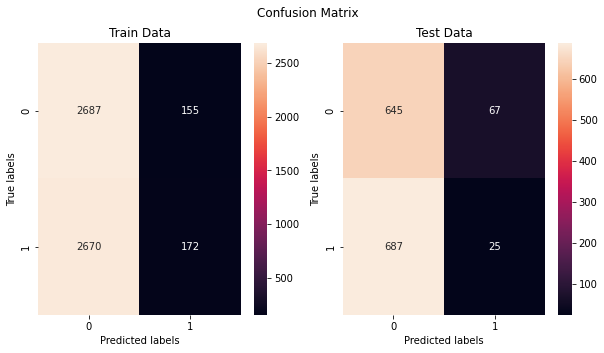

In [116]:
import seaborn as sns
fig, axes = plt.subplots(ncols = 2, figsize = (10, 5))
ax1, ax2 = axes
sns.heatmap(cm_train, annot = True, fmt = 'g', ax = ax1)
sns.heatmap(cm_test, annot = True, fmt = 'g', ax = ax2)
ax1.set_title('Train Data')
ax1.set_xlabel('Predicted labels')
ax1.set_ylabel('True labels')
ax1.xaxis.set_ticklabels(['0', '1'])
ax1.yaxis.set_ticklabels(['0', '1'])

ax2.set_title('Test Data')
ax2.set_xlabel('Predicted labels')
ax2.set_ylabel('True labels')
ax2.xaxis.set_ticklabels(['0', '1'])
ax2.yaxis.set_ticklabels(['0', '1'])

fig.suptitle('Confusion Matrix')

ii. Logistics Regression

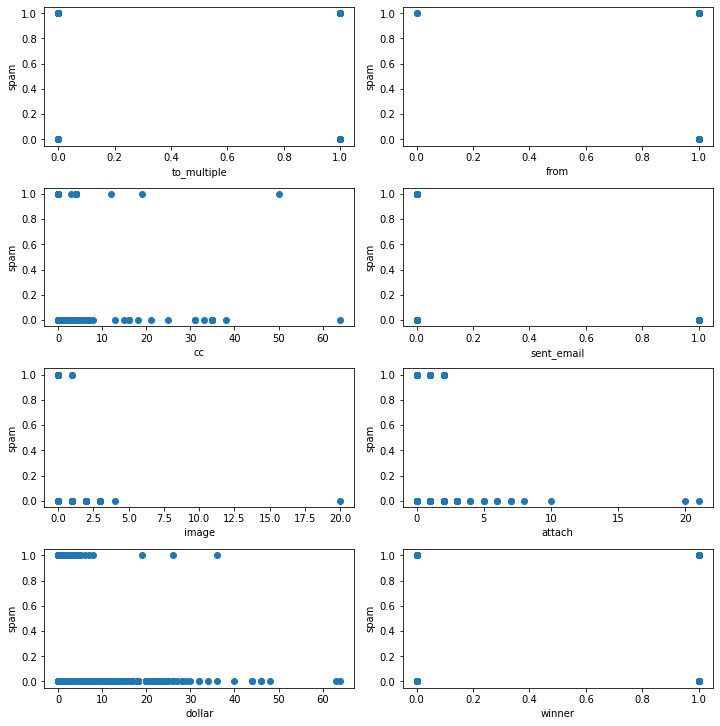

In [117]:
fig = plt.figure(figsize=(10, 10))
fig.constrained_layout = True

ax11 = fig.add_subplot(421)
ax12 = fig.add_subplot(422)
ax21 = fig.add_subplot(423)
ax22 = fig.add_subplot(424)

ax31 = fig.add_subplot(425)
ax32 = fig.add_subplot(426)
ax41 = fig.add_subplot(427)
ax42 = fig.add_subplot(428)

ax11.scatter(spam_classification_train_data['to_multiple'], spam_classification_train_data['spam'])
ax11.set_xlabel('to_multiple')
ax11.set_ylabel('spam')

ax12.scatter(spam_classification_train_data['from'], spam_classification_train_data['spam'])
ax12.set_xlabel('from')
ax12.set_ylabel('spam')

ax21.scatter(spam_classification_train_data['cc'], spam_classification_train_data['spam'])
ax21.set_xlabel('cc')
ax21.set_ylabel('spam')

ax22.scatter(spam_classification_train_data['sent_email'], spam_classification_train_data['spam'])
ax22.set_xlabel('sent_email')
ax22.set_ylabel('spam')

ax31.scatter(spam_classification_train_data['image'], spam_classification_train_data['spam'])
ax31.set_xlabel('image')
ax31.set_ylabel('spam')

ax32.scatter(spam_classification_train_data['attach'], spam_classification_train_data['spam'])
ax32.set_xlabel('attach')
ax32.set_ylabel('spam')

ax41.scatter(spam_classification_train_data['dollar'], spam_classification_train_data['spam'])
ax41.set_xlabel('dollar')
ax41.set_ylabel('spam')

ax42.scatter(spam_classification_train_data['winner'], spam_classification_train_data['spam'])
ax42.set_xlabel('winner')
ax42.set_ylabel('spam')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()


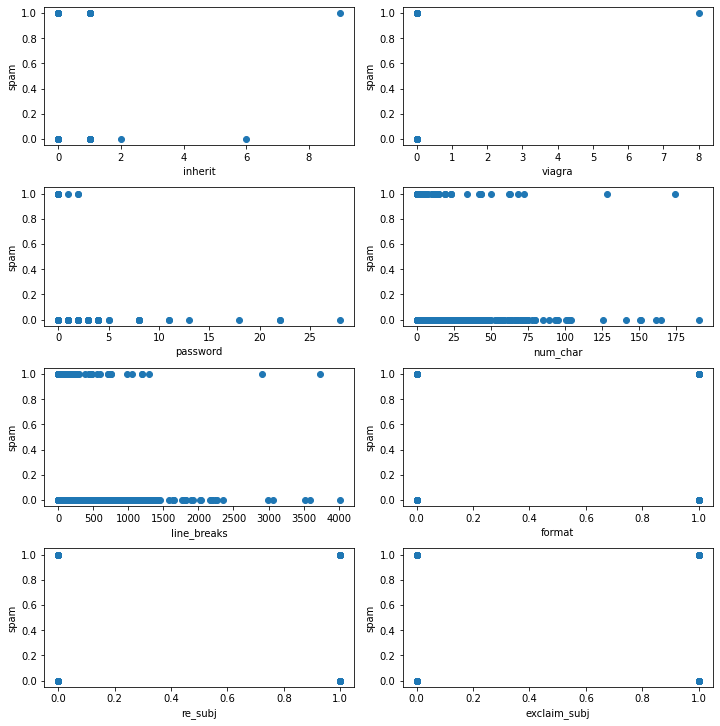

In [118]:
fig = plt.figure(figsize=(10, 10))
fig.constrained_layout = True

ax11 = fig.add_subplot(421)
ax12 = fig.add_subplot(422)
ax21 = fig.add_subplot(423)
ax22 = fig.add_subplot(424)

ax31 = fig.add_subplot(425)
ax32 = fig.add_subplot(426)
ax41 = fig.add_subplot(427)
ax42 = fig.add_subplot(428)

ax11.scatter(spam_classification_train_data['inherit'], spam_classification_train_data['spam'])
ax11.set_xlabel('inherit')
ax11.set_ylabel('spam')

ax12.scatter(spam_classification_train_data['viagra'], spam_classification_train_data['spam'])
ax12.set_xlabel('viagra')
ax12.set_ylabel('spam')

ax21.scatter(spam_classification_train_data['password'], spam_classification_train_data['spam'])
ax21.set_xlabel('password')
ax21.set_ylabel('spam')

ax22.scatter(spam_classification_train_data['num_char'], spam_classification_train_data['spam'])
ax22.set_xlabel('num_char')
ax22.set_ylabel('spam')

ax31.scatter(spam_classification_train_data['line_breaks'], spam_classification_train_data['spam'])
ax31.set_xlabel('line_breaks')
ax31.set_ylabel('spam')

ax32.scatter(spam_classification_train_data['format'], spam_classification_train_data['spam'])
ax32.set_xlabel('format')
ax32.set_ylabel('spam')

ax41.scatter(spam_classification_train_data['re_subj'], spam_classification_train_data['spam'])
ax41.set_xlabel('re_subj')
ax41.set_ylabel('spam')

ax42.scatter(spam_classification_train_data['exclaim_subj'], spam_classification_train_data['spam'])
ax42.set_xlabel('exclaim_subj')
ax42.set_ylabel('spam')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

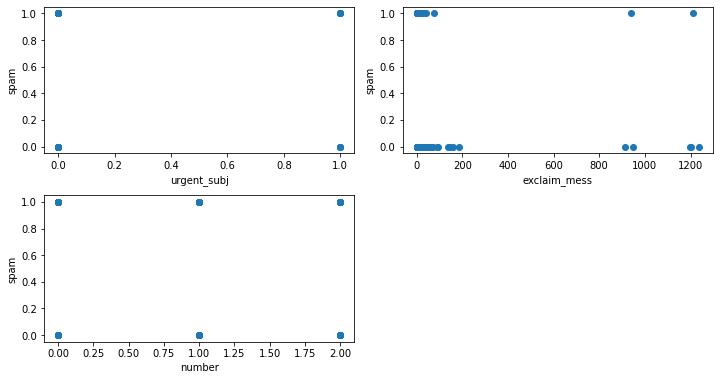

In [119]:
fig = plt.figure(figsize=(10, 10))
fig.constrained_layout = True

ax11 = fig.add_subplot(421)
ax12 = fig.add_subplot(422)
ax21 = fig.add_subplot(423)

ax11.scatter(spam_classification_train_data['urgent_subj'], spam_classification_train_data['spam'])
ax11.set_xlabel('urgent_subj')
ax11.set_ylabel('spam')

ax12.scatter(spam_classification_train_data['exclaim_mess'], spam_classification_train_data['spam'])
ax12.set_xlabel('exclaim_mess')
ax12.set_ylabel('spam')

ax21.scatter(spam_classification_train_data['number'], spam_classification_train_data['spam'])
ax21.set_xlabel('number')
ax21.set_ylabel('spam')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

In [120]:
from sklearn.linear_model import LogisticRegression
# creating an object of LogisticRegression class

solvers = ['newton-cg','lbfgs','liblinear']
c_values = np.array([1e6,1e3,100,10,1.0,0.1,0.01])
best_c_value = {}
cv_k = 5 #5-fold cross validation
for solver in solvers:
  avg_score = np.zeros(len(c_values))
  # print (avg_score)
  for c_value in c_values:
    clf_lr = LogisticRegression(solver = solver, C = c_value, max_iter=100000, random_state=0)
    scores = cross_val_score(clf_lr, train_X, train_y.ravel(), cv=cv_k) 
    # print ('scores',scores)
    avg_score[np.where(c_values==c_value)] = np.mean(scores)

  # print ('avg score',avg_score)
  max_score_index = np.argmax(avg_score)
  # print (max_score_index)
  best_c_value[solver] = c_values[int(max_score_index)]

print ('Best C value = ', best_c_value)

Best C value =  {'newton-cg': 0.01, 'lbfgs': 0.01, 'liblinear': 0.01}


In [121]:
logit = LogisticRegression(solver = 'lbfgs', C=1, max_iter=100000, random_state=0) 
logit.fit(train_X,train_y.ravel())

LogisticRegression(C=1, max_iter=100000, random_state=0)

In [122]:
print(logit.intercept_)
print(logit.coef_)

[-0.04508365]
[[-0.01176557 -0.09238893  0.00653182  0.06062445  0.09808056 -0.04036819
  -0.00394947  0.01635619 -0.17981425  0.07648859  0.00595759  0.00935812
  -0.00052257  0.17428264 -0.00822268 -0.0856111   0.02978394  0.00038256
   0.03769981]]


In [123]:
predicted_train_y = logit.predict(train_X)
predicted_test_y = logit.predict(test_X)

In [124]:
train_cr = classification_report(train_y, predicted_train_y)
print("Train Report:")
print(train_cr)
test_cr = classification_report(test_y, predicted_test_y)
print("Test Report:")
print(test_cr)

Train Report:
              precision    recall  f1-score   support

           0       0.52      0.52      0.52      2842
           1       0.52      0.53      0.53      2842

    accuracy                           0.52      5684
   macro avg       0.52      0.52      0.52      5684
weighted avg       0.52      0.52      0.52      5684

Test Report:
              precision    recall  f1-score   support

           0       0.39      0.38      0.38       712
           1       0.39      0.39      0.39       712

    accuracy                           0.39      1424
   macro avg       0.39      0.39      0.39      1424
weighted avg       0.39      0.39      0.39      1424



In [125]:
cm_train = confusion_matrix(train_y, predicted_train_y)
print('Confusion matrix train set:')
print(cm_train)

cm_test = confusion_matrix(test_y, predicted_test_y)
print('Confusion matrix test set:')
print(cm_test)

Confusion matrix train set:
[[1471 1371]
 [1338 1504]]
Confusion matrix test set:
[[270 442]
 [431 281]]


Text(0.5, 0.98, 'Confusion Matrix')

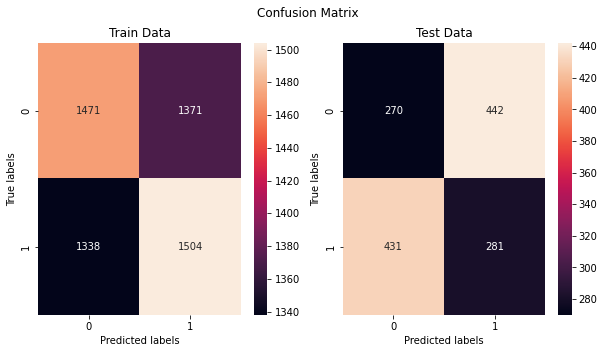

In [126]:
fig, axes = plt.subplots(ncols = 2, figsize = (10, 5))
ax1, ax2 = axes
sns.heatmap(cm_train, annot = True, fmt = 'g', ax = ax1)
sns.heatmap(cm_test, annot = True, fmt = 'g', ax = ax2)
ax1.set_title('Train Data')
ax1.set_xlabel('Predicted labels')
ax1.set_ylabel('True labels')
ax1.xaxis.set_ticklabels(['0', '1'])
ax1.yaxis.set_ticklabels(['0', '1'])

ax2.set_title('Test Data')
ax2.set_xlabel('Predicted labels')
ax2.set_ylabel('True labels')
ax2.xaxis.set_ticklabels(['0', '1'])
ax2.yaxis.set_ticklabels(['0', '1'])

fig.suptitle('Confusion Matrix')

iii. Soft-Margin SVM

In [127]:
from sklearn import svm
from sklearn.svm import LinearSVC #linear svm from scikit learn 

c_values = np.array([1e6,1e3,100,10,1.0,0.1,0.01])
best_c_value = []
cv_k = 5 #5-fold cross validation
avg_score = np.zeros(len(c_values))
# print (avg_score)
for c_value in c_values:
  clf_svm = LinearSVC(C = c_value, max_iter=100000, random_state=0, tol=1e-3)
  scores = cross_val_score(clf_svm, train_X, train_y.ravel(), cv=cv_k) 
  # print ('scores',scores)
  avg_score[np.where(c_values==c_value)] = np.mean(scores)

  # print ('avg score',avg_score)
  max_score_index = np.argmax(avg_score)
  # print (max_score_index)
  best_c_value = c_values[int(max_score_index)]

print ('Best C value = ', best_c_value)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

Best C value =  0.1


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [128]:
clf_svm = LinearSVC(C=1, random_state=0, tol=1e-3, max_iter=100000)
clf_model = clf_svm.fit(train_X,train_y.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [129]:
predicted_train_y = clf_model.predict(train_X)
predicted_test_y = clf_model.predict(test_X)

In [130]:
train_cr = classification_report(train_y, predicted_train_y)
print("Train Report:")
print(train_cr)
test_cr = classification_report(test_y, predicted_test_y)
print("Test Report:")
print(test_cr)

Train Report:
              precision    recall  f1-score   support

           0       0.52      0.63      0.57      2842
           1       0.53      0.41      0.46      2842

    accuracy                           0.52      5684
   macro avg       0.52      0.52      0.52      5684
weighted avg       0.52      0.52      0.52      5684

Test Report:
              precision    recall  f1-score   support

           0       0.44      0.52      0.48       712
           1       0.42      0.35      0.38       712

    accuracy                           0.43      1424
   macro avg       0.43      0.43      0.43      1424
weighted avg       0.43      0.43      0.43      1424



In [131]:
cm_train = confusion_matrix(train_y, predicted_train_y)
print('Confusion matrix train set:')
print(cm_train)

cm_test = confusion_matrix(test_y, predicted_test_y)
print('Confusion matrix test set:')
print(cm_test)

Confusion matrix train set:
[[1802 1040]
 [1674 1168]]
Confusion matrix test set:
[[371 341]
 [464 248]]


Text(0.5, 0.98, 'Confusion Matrix')

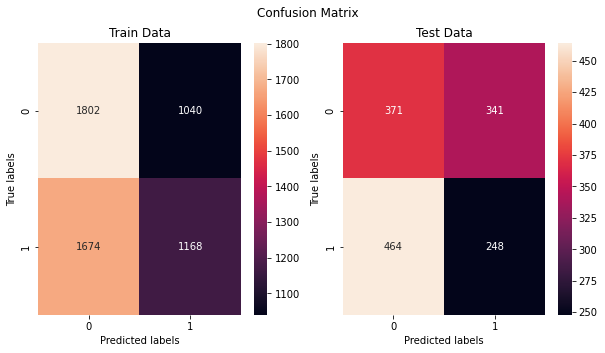

In [132]:
fig, axes = plt.subplots(ncols = 2, figsize = (10, 5))
ax1, ax2 = axes
sns.heatmap(cm_train, annot = True, fmt = 'g', ax = ax1)
sns.heatmap(cm_test, annot = True, fmt = 'g', ax = ax2)
ax1.set_title('Train Data')
ax1.set_xlabel('Predicted labels')
ax1.set_ylabel('True labels')
ax1.xaxis.set_ticklabels(['0', '1'])
ax1.yaxis.set_ticklabels(['0', '1'])

ax2.set_title('Test Data')
ax2.set_xlabel('Predicted labels')
ax2.set_ylabel('True labels')
ax2.xaxis.set_ticklabels(['0', '1'])
ax2.yaxis.set_ticklabels(['0', '1'])

fig.suptitle('Confusion Matrix')

In [ ]:
iv. Decision Tree

In [133]:
from sklearn import tree #decision tree from scikit learn

criteria = ['entropy', 'gini']
max_depth = np.array([1,2,5,10,15,20])
best_depth = {}
cv_k = 5 #5-fold cross validation
for criterion in criteria:
  avg_score = np.zeros(len(max_depth))
  # print (avg_score)
  for depth in max_depth:
    clf_dt = tree.DecisionTreeClassifier(criterion=criterion, max_depth=depth, random_state=0)
    scores = cross_val_score(clf_dt, train_X, train_y.ravel(), cv=cv_k) 
    # print ('scores',scores)
    avg_score[np.where(max_depth==depth)] = np.mean(scores)

  print('criterion:', criterion)
  print ('avg score',avg_score)
  max_score_index = np.argmax(avg_score)
  #print (max_score_index)
  best_depth[criterion] = max_depth[int(max_score_index)]

print ('Best depth = ', best_depth)

criterion: entropy
avg score [0.50123116 0.5061564  0.51108582 0.50932572 0.49912158 0.49630576]
criterion: gini
avg score [0.50140721 0.50650851 0.50299389 0.4977139  0.50035335 0.50070345]
Best depth =  {'entropy': 5, 'gini': 2}


In [134]:
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=20)
# tree.plot_tree(clf.fit(train_features, train_label)) 
clf_model = clf.fit(train_X,train_y)

In [137]:
predicted_train_y = clf_model.predict(train_X)
predicted_test_y = clf_model.predict(test_X)

In [138]:
train_cr = classification_report(train_y, predicted_train_y)
print("Train Report:")
print(train_cr)
test_cr = classification_report(test_y, predicted_test_y)
print("Test Report:")
print(test_cr)

Train Report:
              precision    recall  f1-score   support

           0       0.63      0.78      0.70      2842
           1       0.71      0.55      0.62      2842

    accuracy                           0.67      5684
   macro avg       0.67      0.67      0.66      5684
weighted avg       0.67      0.67      0.66      5684

Test Report:
              precision    recall  f1-score   support

           0       0.52      0.56      0.54       712
           1       0.53      0.49      0.51       712

    accuracy                           0.53      1424
   macro avg       0.53      0.53      0.52      1424
weighted avg       0.53      0.53      0.52      1424



In [139]:
cm_train = confusion_matrix(train_y, predicted_train_y)
print('Confusion matrix train set:')
print(cm_train)

cm_test = confusion_matrix(test_y, predicted_test_y)
print('Confusion matrix test set:')
print(cm_test)

Confusion matrix train set:
[[2210  632]
 [1272 1570]]
Confusion matrix test set:
[[396 316]
 [360 352]]


Text(0.5, 0.98, 'Confusion Matrix')

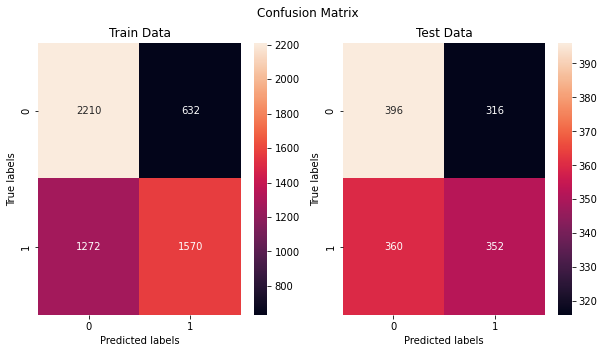

In [140]:
fig, axes = plt.subplots(ncols = 2, figsize = (10, 5))
ax1, ax2 = axes
sns.heatmap(cm_train, annot = True, fmt = 'g', ax = ax1)
sns.heatmap(cm_test, annot = True, fmt = 'g', ax = ax2)
ax1.set_title('Train Data')
ax1.set_xlabel('Predicted labels')
ax1.set_ylabel('True labels')
ax1.xaxis.set_ticklabels(['0', '1'])
ax1.yaxis.set_ticklabels(['0', '1'])

ax2.set_title('Test Data')
ax2.set_xlabel('Predicted labels')
ax2.set_ylabel('True labels')
ax2.xaxis.set_ticklabels(['0', '1'])
ax2.yaxis.set_ticklabels(['0', '1'])

fig.suptitle('Confusion Matrix')

v. Random Forest

In [141]:
# We will use cross validation to find random forest hyperparameters.
# We will first find best max depths for a given set of estimators
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import math

num_features = train_X.shape[1]
estimators = [5,10,50,100,150,200]
constant = math.sqrt(num_features)
max_depth = constant*np.array([0.25,0.5, 0.75,1,1.25,1.50,1.75,2])
max_depth = np.ceil(max_depth)
print ('maximum depth', max_depth)
best_depth = {}
cv_k = 5 #5-fold cross validation
for n_estimate in estimators:
  avg_score = np.zeros(len(max_depth))
  # print (avg_score)
  for depth in max_depth:
    clf_rf = RandomForestClassifier(n_estimators = n_estimate,max_depth = depth,  random_state=0)
    scores = cross_val_score(clf_rf, train_X, train_y.ravel(), cv=cv_k) 
    # print ('scores',scores)
    avg_score[np.where(max_depth==depth)] = np.mean(scores)

  # print ('avg score',avg_score)
  max_score_index = np.argmax(avg_score)
  # print (max_score_index)
  best_depth[n_estimate] = max_depth[int(max_score_index)]

print ('maximum depth = ', best_depth)

maximum depth [2. 3. 4. 5. 6. 7. 8. 9.]
maximum depth =  {5: 6.0, 10: 2.0, 50: 5.0, 100: 5.0, 150: 5.0, 200: 2.0}


In [142]:
## Now let's find the number of estimators
avg_score = np.zeros(len(estimators))
# print (estimators)
for n_estimate in estimators:
    depth = best_depth[n_estimate]
    clf_rf = RandomForestClassifier(n_estimators = n_estimate,max_depth = depth,  random_state=0)
    scores = cross_val_score(clf_rf, train_X, train_y.ravel(), cv=cv_k) 
    avg_score[estimators.index(n_estimate)] = np.mean(scores)

print ('avg score =',avg_score)
max_score_index = np.argmax(avg_score)
best_estimator = estimators[max_score_index]
best_max_depth = best_depth[best_estimator]
print ('Number of estimators = ',best_estimator)
print ('maximum depth =',best_max_depth)


avg score = [0.51354736 0.51161337 0.51143391 0.50633199 0.50439661 0.50422504]
Number of estimators =  5
maximum depth = 6.0


In [143]:
clf_rf = RandomForestClassifier(n_estimators = best_estimator,max_depth = best_max_depth,  random_state=0)
clf_model = clf_rf.fit(train_X, train_y.ravel())

In [144]:
predicted_train_y = clf_rf.predict(train_X)
predicted_test_y = clf_rf.predict(test_X)

In [145]:
train_cr = classification_report(train_y, predicted_train_y)
print("Train Report:")
print(train_cr)
test_cr = classification_report(test_y, predicted_test_y)
print("Test Report:")
print(test_cr)

Train Report:
              precision    recall  f1-score   support

           0       0.57      0.52      0.54      2842
           1       0.56      0.61      0.58      2842

    accuracy                           0.56      5684
   macro avg       0.56      0.56      0.56      5684
weighted avg       0.56      0.56      0.56      5684

Test Report:
              precision    recall  f1-score   support

           0       0.46      0.40      0.43       712
           1       0.47      0.53      0.50       712

    accuracy                           0.47      1424
   macro avg       0.47      0.47      0.46      1424
weighted avg       0.47      0.47      0.46      1424



In [146]:
cm_train = confusion_matrix(train_y, predicted_train_y)
print('Confusion matrix train set:')
print(cm_train)

cm_test = confusion_matrix(test_y, predicted_test_y)
print('Confusion matrix test set:')
print(cm_test)

Confusion matrix train set:
[[1481 1361]
 [1118 1724]]
Confusion matrix test set:
[[288 424]
 [337 375]]


Text(0.5, 0.98, 'Confusion Matrix')

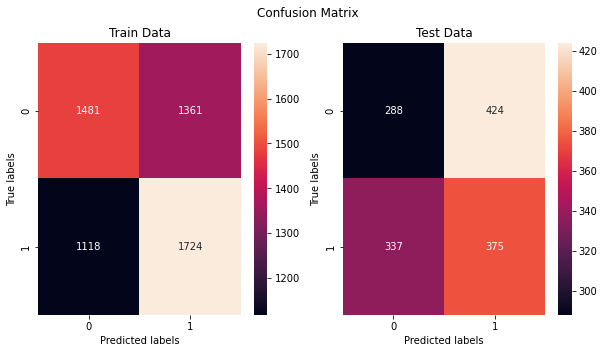

In [147]:
fig, axes = plt.subplots(ncols = 2, figsize = (10, 5))
ax1, ax2 = axes
sns.heatmap(cm_train, annot = True, fmt = 'g', ax = ax1)
sns.heatmap(cm_test, annot = True, fmt = 'g', ax = ax2)
ax1.set_title('Train Data')
ax1.set_xlabel('Predicted labels')
ax1.set_ylabel('True labels')
ax1.xaxis.set_ticklabels(['0', '1'])
ax1.yaxis.set_ticklabels(['0', '1'])

ax2.set_title('Test Data')
ax2.set_xlabel('Predicted labels')
ax2.set_ylabel('True labels')
ax2.xaxis.set_ticklabels(['0', '1'])
ax2.yaxis.set_ticklabels(['0', '1'])

fig.suptitle('Confusion Matrix')

vi. Kernel Machines

In [148]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

gammas = [0.0001,0.001, 0.01, 0.1, 1, 20, 40, 60, 80, 100]
kernels = ['sigmoid','rbf'] #linear, poly
best_gamma = {}
cv_k = 5 #5-fold cross validation
for kernel_ in kernels:
  print (kernel_,'kernel')
  avg_score = np.zeros(len(gammas))
  for gamma in gammas:
    clf = SVC(kernel=kernel_, gamma=gamma, random_state=1)
    scores = cross_val_score(clf, train_X, train_y.ravel(), cv=cv_k) 
    avg_score[gammas.index(gamma)] = np.mean(scores)
    # print ('average score for kernel',kernel_, 'at gamma = ', gamma,'is',avg_score[gammas.index(gamma)])
  print ('ave_score', avg_score)
  max_score_index = np.argmax(avg_score)
  # print (max_score_index)
  best_gamma[kernel_] = gammas[int(max_score_index)]

print ('best hyperparameters = ', best_gamma)

sigmoid kernel
ave_score [0.49577821 0.4915575  0.49296471 0.50017668 0.49929608 0.4996482
 0.4996482  0.4996482  0.4996482  0.4996482 ]
rbf kernel
ave_score [0.49964711 0.50386705 0.50474857 0.49718589 0.49771096 0.50263961
 0.50457421 0.50387138 0.5021119  0.50299203]
best hyperparameters =  {'sigmoid': 0.1, 'rbf': 0.01}


In [149]:
# We will use the rbf kernel with gamma value of 1
clf_kernel = SVC(kernel='rbf', gamma=1, max_iter = 10000, random_state = 0)
clf_model = clf_kernel.fit(train_X,train_y.ravel())

In [150]:
predicted_train_y = clf_model.predict(train_X)
predicted_test_y = clf_model.predict(test_X)

In [151]:
train_cr = classification_report(train_y, predicted_train_y)
print("Train Report:")
print(train_cr)
test_cr = classification_report(test_y, predicted_test_y)
print("Test Report:")
print(test_cr)

Train Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      2842
           1       0.83      0.79      0.81      2842

    accuracy                           0.82      5684
   macro avg       0.82      0.82      0.82      5684
weighted avg       0.82      0.82      0.82      5684

Test Report:
              precision    recall  f1-score   support

           0       0.53      0.67      0.59       712
           1       0.55      0.41      0.47       712

    accuracy                           0.54      1424
   macro avg       0.54      0.54      0.53      1424
weighted avg       0.54      0.54      0.53      1424



In [152]:
cm_train = confusion_matrix(train_y, predicted_train_y)
cm_test = confusion_matrix(test_y, predicted_test_y)

Text(0.5, 0.98, 'Confusion Matrix')

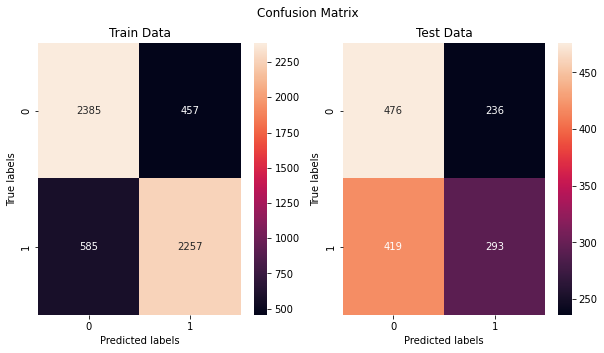

In [153]:
fig, axes = plt.subplots(ncols = 2, figsize = (10, 5))
ax1, ax2 = axes
sns.heatmap(cm_train, annot = True, fmt = 'g', ax = ax1)
sns.heatmap(cm_test, annot = True, fmt = 'g', ax = ax2)
ax1.set_title('Train Data')
ax1.set_xlabel('Predicted labels')
ax1.set_ylabel('True labels')
ax1.xaxis.set_ticklabels(['0', '1'])
ax1.yaxis.set_ticklabels(['0', '1'])

ax2.set_title('Test Data')
ax2.set_xlabel('Predicted labels')
ax2.set_ylabel('True labels')
ax2.xaxis.set_ticklabels(['0', '1'])
ax2.yaxis.set_ticklabels(['0', '1'])

fig.suptitle('Confusion Matrix')